# 深度學習(Deep Learning)
本章節分成三大段落  
1. 自動微分
2. 簡單線性回歸
3. 使用Tensorflow 進行數字0~9辨識

In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

## 一、自動微分

### 1. 利用tenosrflow 
[資料來源](https://ithelp.ithome.com.tw/articles/10233555)  
方程式: $y = X^2$   
使用套件: tensorflow   
資料為numpy，但須轉為tensorflow資料型態

In [2]:
import numpy as np 
import tensorflow as tf 

# x 宣告為 tf.constant，就要加 g.watch(x)
x = tf.Variable(3.0)

# 自動微分: 使用tensorflow進行一皆導數
with tf.GradientTape() as g:
    #g.watch(x)
    y = x * x
    
# g.gradient(y, x) 取得梯度，Y對x作微分
dy_dx = g.gradient(y, x) # Will compute to 6.0

# 轉換為 NumPy array 格式，方便顯示
print(dy_dx.numpy())

6.0


### 2. 利用Pytoch 進行自動微分與梯度下降
需先安裝Pytoch，[參考網址](https://pytorch.org/get-started/locally/) 

In [3]:
import torch

x = torch.tensor(3.0, requires_grad=True)
y=x*x

# 反向傳導
y.backward()

print(x.grad)

tensor(6.)


## 二.利用tensorflow進行簡單迴歸
需先安裝套件，詳細安裝方法可[參考網站](https://ithelp.ithome.com.tw/articles/10233272)  

屬於神經網路中的神經層程式碼  
若要改變神經層可以套用此公式  

### 1.利用線性隨機取分別X與y 0~50之100個數據，進行簡單回歸

Epoch 0: Loss: 865.22216796875
Epoch 1: Loss: 612.959228515625
Epoch 2: Loss: 440.900146484375
Epoch 3: Loss: 323.5451965332031
Epoch 4: Loss: 243.50177001953125
Epoch 5: Loss: 188.90721130371094
Epoch 6: Loss: 151.67022705078125
Epoch 7: Loss: 126.27222442626953
Epoch 8: Loss: 108.9491958618164
Epoch 9: Loss: 97.13369750976562
Epoch 10: Loss: 89.07474517822266
Epoch 11: Loss: 83.57794952392578
Epoch 12: Loss: 79.82872009277344
Epoch 13: Loss: 77.2714614868164
Epoch 14: Loss: 75.52715301513672
Epoch 15: Loss: 74.33736419677734
Epoch 16: Loss: 73.52577209472656
Epoch 17: Loss: 72.97213745117188
Epoch 18: Loss: 72.59445190429688
Epoch 19: Loss: 72.3367691040039
Epoch 20: Loss: 72.16093444824219
Epoch 21: Loss: 72.04093170166016
Epoch 22: Loss: 71.9590072631836
Epoch 23: Loss: 71.90304565429688
Epoch 24: Loss: 71.86479949951172
Epoch 25: Loss: 71.83863830566406
Epoch 26: Loss: 71.82072448730469
Epoch 27: Loss: 71.80842590332031
Epoch 28: Loss: 71.79995727539062
Epoch 29: Loss: 71.79409790

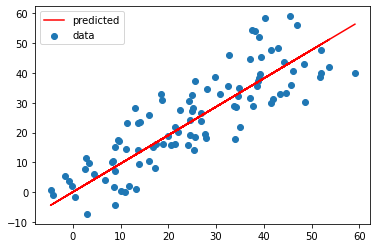

In [4]:
import numpy as np 
import tensorflow as tf 

# y_pred = W*X + b，W與b可以隨意設定
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# 定義損失函數
def loss(y, y_pred):
    return tf.reduce_mean(tf.square(y - y_pred))  #MSE公式

# 定義預測值
def predict(X):
    return W * X + b
    
# 定義訓練函數
def train(X, y, epochs=40, lr=0.0001):
    current_loss=0
    # 執行訓練
    for epoch in range(epochs):
        with tf.GradientTape() as t:   # 梯度下降
            t.watch(tf.constant(X))    # X變數設定為常數constant需加入watch
            current_loss = loss(y, predict(X))

        # 取得 W, b 個別的梯度
        dW, db = t.gradient(current_loss, [W, b])
        
        # 更新權重
        # 新權重 = 原權重 — 學習率(learning_rate) * 梯度(gradient)
        W.assign_sub(lr * dW) # W -= lr * dW
        b.assign_sub(lr * db)

        # 顯示每一訓練週期的損失函數
        print(f'Epoch {epoch}: Loss: {current_loss.numpy()}') 


# 產生隨機資料
# random linear data: 100 between 0-50
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 
  
# Adding noise to the random linear data 
X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

# reset W,b
W = tf.Variable(0.0)
b = tf.Variable(0.0)

# 執行訓練
train(X, y)

# W、b 的最佳解
print(W.numpy(), b.numpy())

import matplotlib.pyplot as plt 

plt.scatter(X, y, label='data')
plt.plot(X, predict(X), 'r-', label='predicted')
plt.legend()

## 三、TF sample 辨識0~9的數字
由Tensorflow官網提供程式碼  
從參考網站複製程式碼，[參考網站](https://www.tensorflow.org/overview/?hl=zh_tw) 
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample2.png?raw=true)

In [5]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

#載入資料集mnist，並執行切割
(x_train, y_train),(x_test, y_test) = mnist.load_data()

#特徵工程: (X-min)/(255-0)常態化
x_train, x_test = x_train / 255.0, x_test / 255.0
 
#套入模型: Deep Learning，註解1
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])

'''參數可以改動
    optimizer 優化器，本程式指定adam
    loss 損失率
    metrics 準確率
    (註解2)
'''
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) #隨機梯度下降，註解3
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Epoch 1/5


   1/1875 [..............................] - ETA: 0s - loss: 2.2955 - accuracy: 0.2188

  86/1875 [>.............................] - ETA: 1s - loss: 1.0130 - accuracy: 0.7137

 177/1875 [=>............................] - ETA: 0s - loss: 0.7578 - accuracy: 0.7805

 267/1875 [===>..........................] - ETA: 0s - loss: 0.6533 - accuracy: 0.8114

 358/1875 [====>.........................] - ETA: 0s - loss: 0.5903 - accuracy: 0.8290

 447/1875 [======>.......................] - ETA: 0s - loss: 0.5480 - accuracy: 0.8407

 538/1875 [=======>......................] - ETA: 0s - loss: 0.5185 - accuracy: 0.8493



 627/1875 [=========>....................] - ETA: 0s - loss: 0.4888 - accuracy: 0.8582

 719/1875 [==========>...................] - ETA: 0s - loss: 0.4665 - accuracy: 0.8640

 810/1875 [===========>..................] - ETA: 0s - loss: 0.4466 - accuracy: 0.8694

 900/1875 [=============>................] - ETA: 0s - loss: 0.4289 - accuracy: 0.8747

 991/1875 [==============>...............] - ETA: 0s - loss: 0.4151 - accuracy: 0.8788

1079/1875 [================>.............] - ETA: 0s - loss: 0.4025 - accuracy: 0.8824

1170/1875 [=================>............] - ETA: 0s - loss: 0.3912 - accuracy: 0.8860

1261/1875 [===================>..........] - ETA: 0s - loss: 0.3799 - accuracy: 0.8892



1348/1875 [====================>.........] - ETA: 0s - loss: 0.3713 - accuracy: 0.8915

1439/1875 [======================>.......] - ETA: 0s - loss: 0.3627 - accuracy: 0.8938

1531/1875 [=======================>......] - ETA: 0s - loss: 0.3543 - accuracy: 0.8963

1623/1875 [========================>.....] - ETA: 0s - loss: 0.3459 - accuracy: 0.8987

1714/1875 [==========================>...] - ETA: 0s - loss: 0.3387 - accuracy: 0.9008

1806/1875 [===========================>..] - ETA: 0s - loss: 0.3333 - accuracy: 0.9026



1875/1875 [==============================] - 1s 563us/step - loss: 0.3292 - accuracy: 0.9040


Epoch 2/5
   1/1875 [..............................] - ETA: 0s - loss: 0.5139 - accuracy: 0.8750

  92/1875 [>.............................] - ETA: 0s - loss: 0.1897 - accuracy: 0.9433



 184/1875 [=>............................] - ETA: 0s - loss: 0.1904 - accuracy: 0.9448



 274/1875 [===>..........................] - ETA: 0s - loss: 0.1896 - accuracy: 0.9449

 365/1875 [====>.........................] - ETA: 0s - loss: 0.1880 - accuracy: 0.9450

 457/1875 [======>.......................] - ETA: 0s - loss: 0.1877 - accuracy: 0.9452

 548/1875 [=======>......................] - ETA: 0s - loss: 0.1850 - accuracy: 0.9455

 639/1875 [=========>....................] - ETA: 0s - loss: 0.1861 - accuracy: 0.9448



 731/1875 [==========>...................] - ETA: 0s - loss: 0.1839 - accuracy: 0.9458

 823/1875 [============>.................] - ETA: 0s - loss: 0.1821 - accuracy: 0.9460

 914/1875 [=============>................] - ETA: 0s - loss: 0.1807 - accuracy: 0.9462

1006/1875 [===============>..............] - ETA: 0s - loss: 0.1806 - accuracy: 0.9463



1097/1875 [================>.............] - ETA: 0s - loss: 0.1789 - accuracy: 0.9468

1188/1875 [==================>...........] - ETA: 0s - loss: 0.1779 - accuracy: 0.9470

1275/1875 [===================>..........] - ETA: 0s - loss: 0.1763 - accuracy: 0.9473

1365/1875 [====================>.........] - ETA: 0s - loss: 0.1739 - accuracy: 0.9479



1456/1875 [======================>.......] - ETA: 0s - loss: 0.1730 - accuracy: 0.9484

1547/1875 [=======================>......] - ETA: 0s - loss: 0.1730 - accuracy: 0.9487

1639/1875 [=========================>....] - ETA: 0s - loss: 0.1716 - accuracy: 0.9493

1730/1875 [==========================>...] - ETA: 0s - loss: 0.1710 - accuracy: 0.9495



1821/1875 [============================>.] - ETA: 0s - loss: 0.1696 - accuracy: 0.9499



1875/1875 [==============================] - 1s 559us/step - loss: 0.1693 - accuracy: 0.9502


Epoch 3/5
   1/1875 [..............................] - ETA: 0s - loss: 0.1663 - accuracy: 0.9062



  92/1875 [>.............................] - ETA: 0s - loss: 0.1399 - accuracy: 0.9596



 182/1875 [=>............................] - ETA: 0s - loss: 0.1403 - accuracy: 0.9581



 274/1875 [===>..........................] - ETA: 0s - loss: 0.1385 - accuracy: 0.9599

 366/1875 [====>.........................] - ETA: 0s - loss: 0.1373 - accuracy: 0.9607

 456/1875 [======>.......................] - ETA: 0s - loss: 0.1363 - accuracy: 0.9607

 546/1875 [=======>......................] - ETA: 0s - loss: 0.1395 - accuracy: 0.9592



 639/1875 [=========>....................] - ETA: 0s - loss: 0.1380 - accuracy: 0.9597

 730/1875 [==========>...................] - ETA: 0s - loss: 0.1379 - accuracy: 0.9598

 822/1875 [============>.................] - ETA: 0s - loss: 0.1362 - accuracy: 0.9604

 914/1875 [=============>................] - ETA: 0s - loss: 0.1354 - accuracy: 0.9604



1005/1875 [===============>..............] - ETA: 0s - loss: 0.1356 - accuracy: 0.9600

1096/1875 [================>.............] - ETA: 0s - loss: 0.1340 - accuracy: 0.9605

1183/1875 [=================>............] - ETA: 0s - loss: 0.1335 - accuracy: 0.9607

1275/1875 [===================>..........] - ETA: 0s - loss: 0.1347 - accuracy: 0.9602



1367/1875 [====================>.........] - ETA: 0s - loss: 0.1334 - accuracy: 0.9607

1458/1875 [======================>.......] - ETA: 0s - loss: 0.1336 - accuracy: 0.9608

1550/1875 [=======================>......] - ETA: 0s - loss: 0.1340 - accuracy: 0.9608

1641/1875 [=========================>....] - ETA: 0s - loss: 0.1338 - accuracy: 0.9609



1733/1875 [==========================>...] - ETA: 0s - loss: 0.1327 - accuracy: 0.9612

1825/1875 [============================>.] - ETA: 0s - loss: 0.1323 - accuracy: 0.9614



1875/1875 [==============================] - 1s 558us/step - loss: 0.1323 - accuracy: 0.9614


Epoch 4/5
   1/1875 [..............................] - ETA: 0s - loss: 0.0536 - accuracy: 0.9688



  93/1875 [>.............................] - ETA: 0s - loss: 0.1012 - accuracy: 0.9691

 185/1875 [=>............................] - ETA: 0s - loss: 0.1024 - accuracy: 0.9691



 277/1875 [===>..........................] - ETA: 0s - loss: 0.1018 - accuracy: 0.9689

 368/1875 [====>.........................] - ETA: 0s - loss: 0.1077 - accuracy: 0.9688

 460/1875 [======>.......................] - ETA: 0s - loss: 0.1081 - accuracy: 0.9684

 551/1875 [=======>......................] - ETA: 0s - loss: 0.1082 - accuracy: 0.9685



 643/1875 [=========>....................] - ETA: 0s - loss: 0.1078 - accuracy: 0.9684

 735/1875 [==========>...................] - ETA: 0s - loss: 0.1075 - accuracy: 0.9682

 824/1875 [============>.................] - ETA: 0s - loss: 0.1081 - accuracy: 0.9683

 915/1875 [=============>................] - ETA: 0s - loss: 0.1093 - accuracy: 0.9682



1006/1875 [===============>..............] - ETA: 0s - loss: 0.1106 - accuracy: 0.9681

1090/1875 [================>.............] - ETA: 0s - loss: 0.1110 - accuracy: 0.9679

1182/1875 [=================>............] - ETA: 0s - loss: 0.1114 - accuracy: 0.9678

1272/1875 [===================>..........] - ETA: 0s - loss: 0.1119 - accuracy: 0.9676



1364/1875 [====================>.........] - ETA: 0s - loss: 0.1113 - accuracy: 0.9677

1450/1875 [======================>.......] - ETA: 0s - loss: 0.1117 - accuracy: 0.9674

1542/1875 [=======================>......] - ETA: 0s - loss: 0.1117 - accuracy: 0.9672

1628/1875 [=========================>....] - ETA: 0s - loss: 0.1127 - accuracy: 0.9670

1719/1875 [==========================>...] - ETA: 0s - loss: 0.1127 - accuracy: 0.9668

1811/1875 [===========================>..] - ETA: 0s - loss: 0.1125 - accuracy: 0.9667



1875/1875 [==============================] - 1s 562us/step - loss: 0.1130 - accuracy: 0.9664


Epoch 5/5
   1/1875 [..............................] - ETA: 0s - loss: 0.0162 - accuracy: 1.0000



  92/1875 [>.............................] - ETA: 0s - loss: 0.1058 - accuracy: 0.9704



 179/1875 [=>............................] - ETA: 0s - loss: 0.1029 - accuracy: 0.9715



 270/1875 [===>..........................] - ETA: 0s - loss: 0.1044 - accuracy: 0.9709

 362/1875 [====>.........................] - ETA: 0s - loss: 0.1044 - accuracy: 0.9701



 453/1875 [======>.......................] - ETA: 0s - loss: 0.0995 - accuracy: 0.9721

 545/1875 [=======>......................] - ETA: 0s - loss: 0.0980 - accuracy: 0.9717

 636/1875 [=========>....................] - ETA: 0s - loss: 0.0988 - accuracy: 0.9716

 728/1875 [==========>...................] - ETA: 0s - loss: 0.0981 - accuracy: 0.9722



 819/1875 [============>.................] - ETA: 0s - loss: 0.0974 - accuracy: 0.9723

 911/1875 [=============>................] - ETA: 0s - loss: 0.0961 - accuracy: 0.9722

 999/1875 [==============>...............] - ETA: 0s - loss: 0.0972 - accuracy: 0.9719

1089/1875 [================>.............] - ETA: 0s - loss: 0.0980 - accuracy: 0.9719



1181/1875 [=================>............] - ETA: 0s - loss: 0.0972 - accuracy: 0.9723

1272/1875 [===================>..........] - ETA: 0s - loss: 0.0962 - accuracy: 0.9726

1364/1875 [====================>.........] - ETA: 0s - loss: 0.0964 - accuracy: 0.9723

1456/1875 [======================>.......] - ETA: 0s - loss: 0.0960 - accuracy: 0.9725

1546/1875 [=======================>......] - ETA: 0s - loss: 0.0961 - accuracy: 0.9721

1638/1875 [=========================>....] - ETA: 0s - loss: 0.0963 - accuracy: 0.9721

1730/1875 [==========================>...] - ETA: 0s - loss: 0.0967 - accuracy: 0.9720

1822/1875 [============================>.] - ETA: 0s - loss: 0.0963 - accuracy: 0.9720

1875/1875 [==============================] - 1s 559us/step - loss: 0.0959 - accuracy: 0.9721


  1/313 [..............................] - ETA: 0s - loss: 0.0858 - accuracy: 0.9688

120/313 [==========>...................] - ETA: 0s - loss: 0.1143 - accuracy: 0.9646

247/313 [======================>.......] - ETA: 0s - loss: 0.0914 - accuracy: 0.9727

313/313 [==============================] - 0s 409us/step - loss: 0.0836 - accuracy: 0.9744


[0.08358995616436005, 0.974399983882904]

**準確度: 97.73%**

**註解1 : Deep learning模型說明:**  
![Alt text](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample.png?raw=true)

**註解2: 梯度下降法求最佳解**  
在設定input、output、隱藏層後，進行優化器、損失函數與準確度設定，正向傳導與反向傳導一次為一次epoch，如下圖  
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample3.png?raw=true)


**註解3:Tensorflow優化器**  
[參考網站址](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD)
![](https://github.com/Yi-Huei/bin/blob/master/images/tl_sample4.png?raw=true)

tensorflow損失率  
[參考網站]( https://www.tensorflow.org/api_docs/python/tf/keras/losses)

### 程式說明
[參考網址](https://ithelp.ithome.com.tw/articles/10233758)  
神經網路演算法依舊採用機器學習8大步驟
1. 收集資料(Dataset)
2. 清理資料(Data cleaning)  
3. 特徵工程(Feature Engineerin)
4. 資料分割為訓練組與測試組(Split)  
5. 選擇演算法(Learning Algorithm)  
6. 訓練模型(Train Model)  
7. 打分數(Score Model)  
8. 評估模型(Evalute Model)

In [6]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

In [7]:
# 匯入 MNIST 手寫阿拉伯數字 ，併分割資料
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [8]:
# 訓練/測試資料的 X/y 維度
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
# 訓練資料前10筆圖片的數字
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

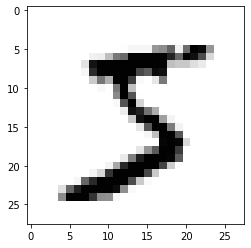

In [10]:
# 查看原始影像
import matplotlib.pyplot as plt 
img = x_train[0].reshape(28, 28)
plt.imshow(img, cmap='Greys')

In [11]:
# 顯示第1張圖片內含值
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [12]:
# 將非0的數字轉為1，顯示第1張圖片
data = x_train[1].copy()
data[data>0]=1

# 將轉換後二維內容顯示出來
text_image=[]
for i in range(data.shape[0]):
    text_image.append(''.join(str(data[i])))
text_image

['[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0]',
 '[0 0 0

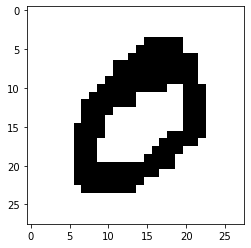

In [13]:
# 使用matplotlib.pyplot將陣列轉成圖片
img = data.reshape(28, 28)
plt.imshow(img, cmap='Greys')

In [14]:
# 特徵縮放，使用常態化(Normalization)，公式 = (x - min) / (max - min)
# 顏色範圍：0~255，所以，公式簡化為 x / 255
# 注意，顏色0為白色，與RGB顏色不同，(0,0,0) 為黑色。
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
x_train_norm[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
# 建立模型
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [16]:
# 設定優化器(optimizer)、損失函數(loss)、效能衡量指標(metrics)的類別
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# 訓練
history = model.fit(x_train_norm, y_train, epochs=5, validation_split=0.2) #訓練時，分割出驗證資料(validation_split)20%

Epoch 1/5


   1/1500 [..............................] - ETA: 0s - loss: 2.4755 - accuracy: 0.1250

  77/1500 [>.............................] - ETA: 0s - loss: 1.0958 - accuracy: 0.6932

 152/1500 [==>...........................] - ETA: 0s - loss: 0.8230 - accuracy: 0.7671

 229/1500 [===>..........................] - ETA: 0s - loss: 0.6756 - accuracy: 0.8102

 299/1500 [====>.........................] - ETA: 0s - loss: 0.6103 - accuracy: 0.8279

 375/1500 [======>.......................] - ETA: 0s - loss: 0.5560 - accuracy: 0.8442

 452/1500 [========>.....................] - ETA: 0s - loss: 0.5188 - accuracy: 0.8535

 529/1500 [=========>....................] - ETA: 0s - loss: 0.4901 - accuracy: 0.8609

 605/1500 [===========>..................] - ETA: 0s - loss: 0.4655 - accuracy: 0.8675

 681/1500 [============>.................] - ETA: 0s - loss: 0.4463 - accuracy: 0.8729

 757/1500 [==============>...............] - ETA: 0s - loss: 0.4291 - accuracy: 0.8772

 834/1500 [===============>..............] - ETA: 0s - loss: 0.4123 - accuracy: 0.8820

 911/1500 [=================>............] - ETA: 0s - loss: 0.3973 - accuracy: 0.8858

 987/1500 [==================>...........] - ETA: 0s - loss: 0.3867 - accuracy: 0.8891

1063/1500 [====================>.........] - ETA: 0s - loss: 0.3744 - accuracy: 0.8921

1139/1500 [=====================>........] - ETA: 0s - loss: 0.3631 - accuracy: 0.8954



1214/1500 [=======================>......] - ETA: 0s - loss: 0.3536 - accuracy: 0.8982

1290/1500 [========================>.....] - ETA: 0s - loss: 0.3454 - accuracy: 0.9010

1367/1500 [==========================>...] - ETA: 0s - loss: 0.3385 - accuracy: 0.9028

1443/1500 [===========================>..] - ETA: 0s - loss: 0.3313 - accuracy: 0.9048

1500/1500 [==============================] - 1s 926us/step - loss: 0.3265 - accuracy: 0.9061 - val_loss: 0.1580 - val_accuracy: 0.9550


Epoch 2/5
   1/1500 [..............................] - ETA: 0s - loss: 0.1695 - accuracy: 0.9375

  80/1500 [>.............................] - ETA: 0s - loss: 0.1888 - accuracy: 0.9441

 159/1500 [==>...........................] - ETA: 0s - loss: 0.1878 - accuracy: 0.9440

 239/1500 [===>..........................] - ETA: 0s - loss: 0.1875 - accuracy: 0.9459

 319/1500 [=====>........................] - ETA: 0s - loss: 0.1879 - accuracy: 0.9458

 399/1500 [======>.......................] - ETA: 0s - loss: 0.1803 - accuracy: 0.9475

 478/1500 [========>.....................] - ETA: 0s - loss: 0.1734 - accuracy: 0.9499

 558/1500 [==========>...................] - ETA: 0s - loss: 0.1705 - accuracy: 0.9509

 636/1500 [===========>..................] - ETA: 0s - loss: 0.1695 - accuracy: 0.9511

 715/1500 [=============>................] - ETA: 0s - loss: 0.1680 - accuracy: 0.9517

 794/1500 [==============>...............] - ETA: 0s - loss: 0.1673 - accuracy: 0.9516

 874/1500 [================>.............] - ETA: 0s - loss: 0.1662 - accuracy: 0.9516

 953/1500 [==================>...........] - ETA: 0s - loss: 0.1654 - accuracy: 0.9516

1032/1500 [===================>..........] - ETA: 0s - loss: 0.1639 - accuracy: 0.9523

1111/1500 [=====================>........] - ETA: 0s - loss: 0.1621 - accuracy: 0.9530

1190/1500 [======================>.......] - ETA: 0s - loss: 0.1607 - accuracy: 0.9534

1263/1500 [========================>.....] - ETA: 0s - loss: 0.1598 - accuracy: 0.9539

1342/1500 [=========================>....] - ETA: 0s - loss: 0.1595 - accuracy: 0.9541

1422/1500 [===========================>..] - ETA: 0s - loss: 0.1590 - accuracy: 0.9542

1491/1500 [============================>.] - ETA: 0s - loss: 0.1582 - accuracy: 0.9545

1500/1500 [==============================] - 1s 791us/step - loss: 0.1580 - accuracy: 0.9546 - val_loss: 0.1162 - val_accuracy: 0.9647


Epoch 3/5
   1/1500 [..............................] - ETA: 0s - loss: 0.1209 - accuracy: 0.9375

  62/1500 [>.............................] - ETA: 1s - loss: 0.1159 - accuracy: 0.9662

 133/1500 [=>............................] - ETA: 1s - loss: 0.1258 - accuracy: 0.9624

 202/1500 [===>..........................] - ETA: 0s - loss: 0.1176 - accuracy: 0.9638

 278/1500 [====>.........................] - ETA: 0s - loss: 0.1144 - accuracy: 0.9643

 347/1500 [=====>........................] - ETA: 0s - loss: 0.1140 - accuracy: 0.9650

 415/1500 [=======>......................] - ETA: 0s - loss: 0.1164 - accuracy: 0.9644

 483/1500 [========>.....................] - ETA: 0s - loss: 0.1171 - accuracy: 0.9642



 551/1500 [==========>...................] - ETA: 0s - loss: 0.1180 - accuracy: 0.9634

 621/1500 [===========>..................] - ETA: 0s - loss: 0.1168 - accuracy: 0.9641

 689/1500 [============>.................] - ETA: 0s - loss: 0.1173 - accuracy: 0.9638

 754/1500 [==============>...............] - ETA: 0s - loss: 0.1186 - accuracy: 0.9631



 820/1500 [===============>..............] - ETA: 0s - loss: 0.1205 - accuracy: 0.9626

 888/1500 [================>.............] - ETA: 0s - loss: 0.1201 - accuracy: 0.9629

 962/1500 [==================>...........] - ETA: 0s - loss: 0.1195 - accuracy: 0.9634

1041/1500 [===================>..........] - ETA: 0s - loss: 0.1199 - accuracy: 0.9634



1115/1500 [=====================>........] - ETA: 0s - loss: 0.1193 - accuracy: 0.9639

1191/1500 [======================>.......] - ETA: 0s - loss: 0.1186 - accuracy: 0.9641

1264/1500 [========================>.....] - ETA: 0s - loss: 0.1183 - accuracy: 0.9641

1337/1500 [=========================>....] - ETA: 0s - loss: 0.1182 - accuracy: 0.9641



1410/1500 [===========================>..] - ETA: 0s - loss: 0.1179 - accuracy: 0.9641

1477/1500 [============================>.] - ETA: 0s - loss: 0.1185 - accuracy: 0.9640

1500/1500 [==============================] - 1s 865us/step - loss: 0.1180 - accuracy: 0.9642 - val_loss: 0.1041 - val_accuracy: 0.9687


Epoch 4/5
   1/1500 [..............................] - ETA: 0s - loss: 0.0784 - accuracy: 0.9688

  35/1500 [..............................] - ETA: 2s - loss: 0.0854 - accuracy: 0.9759

  76/1500 [>.............................] - ETA: 1s - loss: 0.0880 - accuracy: 0.9720

 115/1500 [=>............................] - ETA: 1s - loss: 0.0865 - accuracy: 0.9731

 182/1500 [==>...........................] - ETA: 1s - loss: 0.0903 - accuracy: 0.9730

 255/1500 [====>.........................] - ETA: 1s - loss: 0.0904 - accuracy: 0.9733



 328/1500 [=====>........................] - ETA: 1s - loss: 0.0943 - accuracy: 0.9710

 403/1500 [=======>......................] - ETA: 0s - loss: 0.0997 - accuracy: 0.9696

 476/1500 [========>.....................] - ETA: 0s - loss: 0.1000 - accuracy: 0.9697

 549/1500 [=========>....................] - ETA: 0s - loss: 0.0997 - accuracy: 0.9701



 620/1500 [===========>..................] - ETA: 0s - loss: 0.0995 - accuracy: 0.9695

 694/1500 [============>.................] - ETA: 0s - loss: 0.0995 - accuracy: 0.9693

 773/1500 [==============>...............] - ETA: 0s - loss: 0.0989 - accuracy: 0.9694

 829/1500 [===============>..............] - ETA: 0s - loss: 0.0989 - accuracy: 0.9697



 879/1500 [================>.............] - ETA: 0s - loss: 0.0988 - accuracy: 0.9699

 939/1500 [=================>............] - ETA: 0s - loss: 0.0995 - accuracy: 0.9697

 978/1500 [==================>...........] - ETA: 0s - loss: 0.0991 - accuracy: 0.9698

1015/1500 [===================>..........] - ETA: 0s - loss: 0.0989 - accuracy: 0.9696

1045/1500 [===================>..........] - ETA: 0s - loss: 0.0991 - accuracy: 0.9697

1074/1500 [====================>.........] - ETA: 0s - loss: 0.0987 - accuracy: 0.9698

1101/1500 [=====================>........] - ETA: 0s - loss: 0.0978 - accuracy: 0.9701



1135/1500 [=====================>........] - ETA: 0s - loss: 0.0974 - accuracy: 0.9703

1164/1500 [======================>.......] - ETA: 0s - loss: 0.0976 - accuracy: 0.9703

1192/1500 [======================>.......] - ETA: 0s - loss: 0.0975 - accuracy: 0.9703

1223/1500 [=======================>......] - ETA: 0s - loss: 0.0968 - accuracy: 0.9704

1251/1500 [========================>.....] - ETA: 0s - loss: 0.0968 - accuracy: 0.9703

1279/1500 [========================>.....] - ETA: 0s - loss: 0.0966 - accuracy: 0.9703

1305/1500 [=========================>....] - ETA: 0s - loss: 0.0973 - accuracy: 0.9702

1333/1500 [=========================>....] - ETA: 0s - loss: 0.0971 - accuracy: 0.9702

1359/1500 [==========================>...] - ETA: 0s - loss: 0.0969 - accuracy: 0.9702

1387/1500 [==========================>...] - ETA: 0s - loss: 0.0968 - accuracy: 0.9702

1411/1500 [===========================>..] - ETA: 0s - loss: 0.0969 - accuracy: 0.9703

1442/1500 [===========================>..] - ETA: 0s - loss: 0.0966 - accuracy: 0.9704

1470/1500 [============================>.] - ETA: 0s - loss: 0.0966 - accuracy: 0.9705

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0963 - accuracy: 0.9706 - val_loss: 0.0923 - val_accuracy: 0.9724


Epoch 5/5
   1/1500 [..............................] - ETA: 0s - loss: 0.0180 - accuracy: 1.0000

  43/1500 [..............................] - ETA: 1s - loss: 0.0785 - accuracy: 0.9789

  84/1500 [>.............................] - ETA: 1s - loss: 0.0719 - accuracy: 0.9799

 128/1500 [=>............................] - ETA: 1s - loss: 0.0732 - accuracy: 0.9785



 168/1500 [==>...........................] - ETA: 1s - loss: 0.0738 - accuracy: 0.9771

 212/1500 [===>..........................] - ETA: 1s - loss: 0.0756 - accuracy: 0.9772

 256/1500 [====>.........................] - ETA: 1s - loss: 0.0742 - accuracy: 0.9777

 302/1500 [=====>........................] - ETA: 1s - loss: 0.0730 - accuracy: 0.9780

 348/1500 [=====>........................] - ETA: 1s - loss: 0.0761 - accuracy: 0.9773

 395/1500 [======>.......................] - ETA: 1s - loss: 0.0743 - accuracy: 0.9781

 441/1500 [=======>......................] - ETA: 1s - loss: 0.0754 - accuracy: 0.9773

 488/1500 [========>.....................] - ETA: 1s - loss: 0.0765 - accuracy: 0.9771

 534/1500 [=========>....................] - ETA: 1s - loss: 0.0762 - accuracy: 0.9772

 582/1500 [==========>...................] - ETA: 1s - loss: 0.0761 - accuracy: 0.9773

 628/1500 [===========>..................] - ETA: 0s - loss: 0.0776 - accuracy: 0.9769



 678/1500 [============>.................] - ETA: 0s - loss: 0.0776 - accuracy: 0.9770

 727/1500 [=============>................] - ETA: 0s - loss: 0.0783 - accuracy: 0.9767

 775/1500 [==============>...............] - ETA: 0s - loss: 0.0789 - accuracy: 0.9764

 824/1500 [===============>..............] - ETA: 0s - loss: 0.0791 - accuracy: 0.9762



 873/1500 [================>.............] - ETA: 0s - loss: 0.0795 - accuracy: 0.9763

 920/1500 [=================>............] - ETA: 0s - loss: 0.0794 - accuracy: 0.9765

 970/1500 [==================>...........] - ETA: 0s - loss: 0.0799 - accuracy: 0.9763

1018/1500 [===================>..........] - ETA: 0s - loss: 0.0804 - accuracy: 0.9760

1067/1500 [====================>.........] - ETA: 0s - loss: 0.0806 - accuracy: 0.9760

1114/1500 [=====================>........] - ETA: 0s - loss: 0.0810 - accuracy: 0.9759

1162/1500 [======================>.......] - ETA: 0s - loss: 0.0811 - accuracy: 0.9757

1210/1500 [=======================>......] - ETA: 0s - loss: 0.0812 - accuracy: 0.9758



1259/1500 [========================>.....] - ETA: 0s - loss: 0.0813 - accuracy: 0.9758

1306/1500 [=========================>....] - ETA: 0s - loss: 0.0818 - accuracy: 0.9758

1356/1500 [==========================>...] - ETA: 0s - loss: 0.0817 - accuracy: 0.9756

1404/1500 [===========================>..] - ETA: 0s - loss: 0.0814 - accuracy: 0.9758



1453/1500 [============================>.] - ETA: 0s - loss: 0.0821 - accuracy: 0.9757

1500/1500 [==============================] - 2s 1ms/step - loss: 0.0819 - accuracy: 0.9758 - val_loss: 0.0916 - val_accuracy: 0.9716


loss、accuracy :訓練資料的損失率與正確率  
val_loss、val_accuracy: 驗證資料的損失率與正確率

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

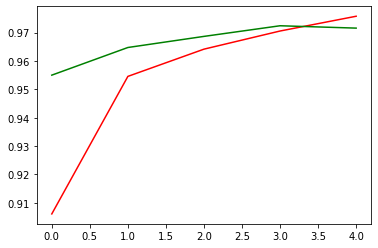

In [19]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')

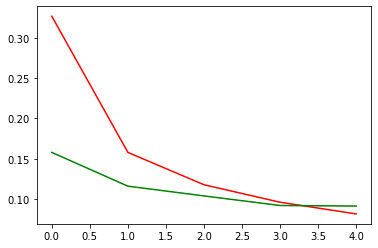

In [20]:
# 對訓練過程的損失函數繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')

In [21]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.08352313190698624, 0.9749000072479248]

In [22]:
# 實際預測 20 筆
predictions = model.predict_classes(x_test_norm)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


prediction: [7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]
actual    : [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


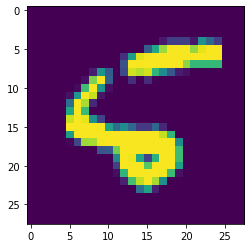

In [23]:
# 顯示錯誤的資料圖像
X2 = x_test[8,:,:]
plt.imshow(X2.reshape(28,28))
plt.show() 

In [24]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [25]:
# 模型存檔
model.save('model.h5')

In [26]:
# 模型載入
model = tf.keras.models.load_model('model.h5')

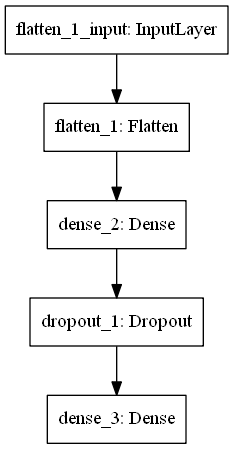

In [27]:
# 繪製模型
# 需安裝 graphviz (https://www.graphviz.org/download/)
# 將安裝路徑 C:\Program Files (x86)\Graphviz2.38\bin 新增至環境變數 path 中
# pip install graphviz
# pip install pydotplus
tf.keras.utils.plot_model(model, to_file='model.png')